<p class='notebook_header'><b>CS 309 - Robot Learning</b></p>
<p class='notebook_header'>Homework 1</p>
<hr class='separate' />

<p class='section_header'><b>Part 1: Linear Algebra</b></p>

Implement the following matrix/vector functions using NumPy operations.

If the function's operation isn't possible for matrix or vector inputs, return None.

In [1]:
import numpy as np

In [2]:
def add(a, b):
    return np.add(a,b)

def subtract(a, b):
    return np.subtract(a,b)

def multiply(a, b):
    return np.dot(a,b)

def divide(a, b):
    return None

def transpose(a):
    return np.transpose(a)

def two_norm(a):
    return np.linalg.norm(a)

<p>Using your code from above, solve the following equations. If an operation isn't possible, put None or comment with "Not Possible".</p>

$$
u = \begin{bmatrix} 2 \\ 3 \\ 9 \end{bmatrix}, \:
v = \begin{bmatrix} -2 \\ 1 \\ 8 \end{bmatrix}
$$  


In [3]:
u = np.array([
    [2],
    [3],
    [9]
])

v = np.array([
    [-2],
    [1],
    [8]
])

$$ u + v = \begin{bmatrix} 0 \\ 4 \\ 17 \end{bmatrix} $$  

$$ u - v = \begin{bmatrix}  4 \\ 2 \\ 1 \end{bmatrix} $$  

$$ u * v = \begin{bmatrix} ? \end{bmatrix} $$  

$$ u \div v = \begin{bmatrix} ? \end{bmatrix} $$  


In [4]:
# YOUR CODE HERE

u_plus_v = add(u, v)

u_minus_v = subtract(u, v)

u_mult_v = None

u_div_v = None

print(u_plus_v)
print(u_minus_v)
print(u_mult_v)
print(u_div_v)

[[ 0]
 [ 4]
 [17]]
[[4]
 [2]
 [1]]
None
None


$$ u^{\;T} * v = \; 71 $$  

$$ u * v^{\;T} = \begin{bmatrix} -4 & 2 & 16 \\ -6 & 3 & 24 \\ -18 & 9 & 72 \end{bmatrix} $$  

$$ u^{\;T} * u = \; 94 $$  

$$ \left \| u \right \|_{2}^{2} = 9.695359714832659 $$  


In [5]:
# YOUR CODE HERE

u_transpose_v = multiply(transpose(u), v)

u_v_tranpose = multiply(u, transpose(v))

u_tranpose_u = multiply(transpose(u), u)

two_norm_u = two_norm(u)
print(u_transpose_v)
print(u_v_tranpose)
print(u_tranpose_u )
print(two_norm_u)

[[71]]
[[ -4   2  16]
 [ -6   3  24]
 [-18   9  72]]
[[94]]
9.695359714832659


<hr class='light-separate' />

$$
A = \begin{bmatrix} 1 & 6 & 5\\ 0 & -4 & -1\\ 7 & 2 & 3 \end{bmatrix}, \: 
B = \begin{bmatrix} 3 & 1 & 1\\ 4 & -1 & 7\\ 7 & 0 & 0 \end{bmatrix}
$$  


$$ A + B = \begin{bmatrix} 4 & 7 & 6 \\ 4 & -5 & 6 \\ 14 & 2 & 3 \end{bmatrix} $$  

$$ A - B = \begin{bmatrix} -2 & 5 & 4 \\ -4 & -3 & -8 \\ 0 & 2 & 3 \end{bmatrix} $$  

$$ A * B = \begin{bmatrix} 62 & -5 & 43 \\ -23 & 4 & -28 \\ 50 & 5 & 21 \end{bmatrix} $$  

$$ A \div B = \begin{bmatrix} ? \end{bmatrix} $$  


In [6]:
# YOUR CODE HERE
A = np.array([[1, 6, 5],
              [0, -4, -1],
              [7, 2, 3]])
B = np.array([[3, 1, 1],
              [4, -1, 7],
              [7, 0, 0]])

a_plus_b = add(A, B)

a_minus_b = subtract(A, B)

a_mult_b = multiply(A, B)

a_div_b = divide(A, B)

print(a_plus_b)
print(a_minus_b)
print(a_mult_b)
print(a_div_b)

[[ 4  7  6]
 [ 4 -5  6]
 [14  2  3]]
[[-2  5  4]
 [-4 -3 -8]
 [ 0  2  3]]
[[ 62  -5  43]
 [-23   4 -28]
 [ 50   5  21]]
None


<hr class='light-separate' />

$$
C = \begin{bmatrix} 5 & 1 \\ -1 & 7 \\ 3 & 0 \end{bmatrix}
$$  


In [7]:
c = np.array([[5, 1],
              [-1, 7],
              [3, 0]])

Right Pseudo Inverse of C:
$$
\begin{bmatrix} 0 & -0.0625 & 0.5 \\ 0.0625 & 0.125 & 0.125 \end{bmatrix}
$$  

Left Pseudo Inverse of C:
$$
\begin{bmatrix} 0 & -0.0625 & 0.5 \\ 0.0625 & 0.125 & 0.125 \end{bmatrix}
$$  


In [8]:
# YOUR CODE HERE
right_pinv = multiply(transpose(c), np.linalg.inv(multiply(c, transpose(c))))

left_pinv = multiply(np.linalg.inv(multiply(transpose(c), c)), transpose(c))
print(right_pinv)
print(left_pinv)

[[ 0.     -0.0625  0.5   ]
 [ 0.0625  0.125   0.125 ]]
[[ 0.1443299  -0.02061856  0.08591065]
 [ 0.0257732   0.13917526  0.00343643]]


<hr class='separate' />

<p class='section_header'><b>Part 2: Regression</b></p>

**Write** the equation for Ordinary Least Squares below. 

$ \theta = (X^TX)^{-1}X^TY $

**Explain** Ordinary Least Squares in terms of what it optimizes.

Ordinary Least squares attempts to model scalar values with a straight line by minimizing the vertical square distance of data points.

In [9]:
# Don't change this cell!
# Load in the data about the study on students
train = np.loadtxt('train.csv', delimiter=',')
x_0, x_1, x_2, y = train.T
X_train = np.array([x_0, x_1, x_2]).T
Y_train = np.expand_dims(y, 1)

test = np.loadtxt('test.csv', delimiter=',')
x_0, x_1, x_2, y = test.T
X_test = np.array([x_0, x_1, x_2]).T
Y_test = np.expand_dims(y, 1)

There was an imaginary study done on 101 students at Crest University. The study surveyed students for the amount they have spent on electronics, books, pencils, and foods. 

Given that the **amount students spend on electronics ($Y$)** is linearly related to the **amount they spend on books ($ X_{0} $), pencils ($ X_{1}$)**, and **food ($ X_{2}$)**, 
**implement** the Ordinary Least Squares method to model this regression problem.

The data is read in from the previous cell code. **X_train** has the input features, while **Y_train** has corresponding target outputs.

After finding a solution, try to measure the error between your predictions and the ground truth. 

In [10]:
# TODO: Create code for OLS here. DO NOT use any other libraries in your first implementation.
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, Y_train)
print(reg.coef_)

def OLS(X, y):
    return multiply(multiply(np.linalg.inv(multiply(transpose(X), X)), transpose(X)),y)

# TODO: check against training data
theta = OLS(X_train,Y_train)
print(theta)

# TODO: test your model on testing data find root mean squares, mse
ans = multiply(X_test, theta)
ans2 = subtract(Y_test, ans)

sum = 0;
for x in ans2:
    for y in x:
        y = np.square(y)
        sum += y
print("Mean square error =", np.sqrt(sum))

[[ -80382.4013135  -200961.46441395   40192.69256631]]
[[-3882.24200431]
 [-9716.64257095]
 [ 1943.69530306]]
Mean square error = 719.5098875727273


**Explain** what collinearity is.

Collinearity is when independent variables have a linear relationship and causes inflation of variance at some regression coefficient. This leads to overfitting a model and failure to find unique solutions.

**Write** the equation for Ridge Regression below. 

$ \theta = (X^TX + kI)^{-1}X^TY $

**Explain** what the purpose ridge regression and its advantages and disadvantages over OLS.

Ridge regression is able to avoid overfitting and collinearity which decreases variance but adds in a bias.

**Implement** your regression model with ridge regression below.

In [11]:
# TODO: Create code for Ridge Regression here. DO NOT use any other libraries
# TODO: Plot your regression line over the input points.
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.001)
reg.fit(X_train, Y_train)
print(reg.coef_)

identity = np.identity(3)
def RR(X, y, ridge=0.001):
    return multiply(multiply(np.linalg.inv(add(multiply(transpose(X), X), multiply(ridge, identity))), transpose(X)), y)

# TODO: check against training data
theta = RR(X_train,Y_train)
print(theta)

# TODO: test your model on testing data
ans = multiply(X_test, theta)
ans2 = subtract(Y_test, ans)

sum = 0;
for x in ans2:
    for y in x:
        y = np.square(y)
        sum += y
print("Mean square error =", np.sqrt(sum))

[[ 1.89355995 -0.72595909  0.54503265]]
[[ 1.92519992]
 [-0.7015006 ]
 [ 0.54357729]]
Mean square error = 49.38844217427166


**Explain** the differences ridge regression created for theta compared to OLS, and why these differences even existed. Also try different values for the ridge parameters and describe how they effect your results.

The theta values for ridge regression were much smaller than OLS. These differences exist because RR shrinks all coefficients toward 0 to decrease their importance in estimates. As the ridge parameter increases, the theta values decrease toward 0.

There are other regularizers other than ridge regression, such as LASSO. **Explain** the differences between LASSO and Ridge Regression and how it changes the solution mathematically.

The difference between LASSO and Ridge Regression is that it tends to make coefficients to absolute zero compared to Ridge which never sets to zero.

In [12]:
# TODO: Create code for LASSO here
# TODO: Plot your regression line over the input points. 
from sklearn.linear_model import Lasso

def LASSO(X, y, ridge=.001):
    reg = Lasso(ridge)
    reg.fit(X, y)
    return reg.coef_

# TODO: check against training data
theta = LASSO(X_train,Y_train)
print(theta)
reg2 = [[2.99099792],[2.01763613], [-0.00368638]]

# TODO: check against testing data
ans = multiply(X_test, reg2)
ans2 = subtract(Y_test, ans)

sum = 0;
for x in ans2:
    for y in x:
        y = np.square(y)
        sum += y
print("Mean square error =", np.sqrt(sum))

[ 2.99099792  2.01763613 -0.00368638]
Mean square error = 86.74783443449947


**Explain** the effect elastic nets had on your values for theta compared to OLS. Also try different values for the ridge parameters and describe how they effect your results.

The theta values for elastic nets were much smaller than OLS. These differences exist because Elastic Nets shrinks all coefficients toward 0 to decrease their importance in estimates. As the ridge parameter increases, the theta values decrease toward 0.

**Explain** the differences between LASSO, Ridge Regression and Elastic Nets and how it changes the solution mathematically.

The difference between LASSO and Ridge Regression is that it tends to make coefficients to absolute zero compared to Ridge which never sets to zero. Elastic Nets is the combination of both LASSO and Ridge Regression that can make coefficients zero.

In [13]:
# TODO: Create code for Elastic Nets here. You can use a library such as scipy
# TODO: Plot your regression line over the input points.
from sklearn.linear_model import ElasticNet

def EN(X,y):
    reg = ElasticNet()
    reg.fit(X, y)
    return reg.coef_

# TODO: check against training data
theta = EN(X_train,Y_train)
print(theta)
reg3 = [[2.87008077],[1.72102521], [0.0556644]]

# TODO: check against testing data
ans = multiply(X_test, reg3)
ans2 = subtract(Y_test, ans)

sum = 0;
for x in ans2:
    for y in x:
        y = np.square(y)
        sum += y
print("Mean square error =", np.sqrt(sum))

[2.87008077 1.72102521 0.0556644 ]
Mean square error = 87.21791195006402


C:\Users\Joshua\miniconda3\envs\fri_rl\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 837.1156596944629, tolerance: 373.2670911197955
  positive)


What is the purpose of a regularizer?

The purpose of a regularizer is to reduce overfitting.

Give two examples where a regularizer would give more robust models.

If a model has many variables, adding a regularizer would add biases and prevent overfitting of all the data. A regularizer would also give more robust models if two independent variables are closely related, so a regularizer would prevent overfitting of these variables.

Explain with reference to the dataset why a regularizer achieved better performance than OLS.

A regularizer greatly decreased the mean square error from 719.5098875727273 by OLS to 49.38844217427166 in Ridge Regression. It was able to reduce overfitting.

<hr class='light-separate' />

Implement feature transformation to fit a line to the curve generated from the .csv file.

In [14]:
X = np.genfromtxt('feature_transform.csv', delimiter=',')
y = X[:,2].reshape(500, 1)
X = X[:,:2]

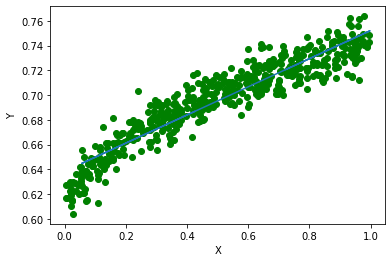

In [15]:
# TODO: Write the lambda function phi which will transform X
# TODO: Plot the transformation and the resulting line after transforming
from sklearn.linear_model import LinearRegression

phi = lambda x: np.sqrt(x)
import matplotlib.pyplot as plt

reg = LinearRegression().fit(X[:, 0].reshape(-1,1), y)
plt.scatter(X[:,0],y,color=(0.0,0.5,0.0))
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(phi(X[:,0].reshape(-1,1)), reg.intercept_ + np.multiply(reg.coef_, phi(X[:, 0]).reshape(-1, 1)))
plt.show()
theta = OLS(X[:, 0].reshape(-1, 1), y)

<hr class='light-separate' />

Recall what you learned about polynomial regression and explain what is happening to the model as you increase the degrees. Run the cell below and use the slider to help you.

The regression model has access to more nth degree polynomial functions to model the relationship between x and y as I increase the degrees. It is similar to overfitting.

In [16]:
# DO NOT ALTER

import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

boston = datasets.load_boston()
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data = pd.concat([data,pd.Series(boston.target,name='MEDV')],axis=1)

X = data[['LSTAT']].values
y = data['MEDV']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, shuffle=True)

temp = pd.DataFrame({'x':x_train.reshape(1, 354)[0], 'y':y_train})
temp = temp.sort_values('x')
x_train = temp['x'].values.reshape(354,1)
y_train = temp['y'].values

temp = pd.DataFrame({'x':x_test.reshape(1, 152)[0], 'y':y_test})
temp = temp.sort_values('x')
x_test = temp['x'].values.reshape(152,1)
y_test = temp['y'].values

def f(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train,y_train)
    y_plot = model.predict(x_test)
    
    plt.scatter(x_train, y_train, s=10, color='red', alpha=.3)
    plt.scatter(x_test, y_test, s=10)

    test_sr = (y_test - y_plot)**2
    test_ssr = test_sr.sum()
    test_asr = test_ssr/len(test_sr)
    
    y_plot_train = model.predict(x_train)
    train_sr = (y_train - y_plot_train)**2
    train_ssr = train_sr.sum()
    train_asr = train_ssr/len(train_sr)
    
    plt.plot(x_test, y_plot, label="degree %d" % degree + '; Test Error: %.2f' % test_asr + '; Train Error: %.2f' % train_asr, color='green')
    plt.legend(loc='upper right')
    plt.show()
    
interact(f, degree = widgets.IntSlider(min=1, max=20, step=1, value=1))

interactive(children=(IntSlider(value=1, description='degree', max=20, min=1), Output()), _dom_classes=('widge…

<function __main__.f(degree)>